In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
product_df = pd.read_csv("product.csv", parse_dates=["score_date"])

# Define High vs. Low Discount Threshold (e.g., Median)
# Use the correct column name from the dataset
discount_threshold = product_df["discount_arr_usd_percentage"].median()

# Create a binary column: 1 for high discount, 0 for low discount
product_df["high_discount"] = (product_df["discount_arr_usd_percentage"] >= discount_threshold).astype(int)

# product_df["high_discount"] = (product_df["discount_rate"] >= discount_threshold).astype(int)

# --- 1. Bar Plot: Churn Rate by Discount Category ---
churn_rates = product_df.groupby("high_discount")["churn_flag"].mean()

plt.figure(figsize=(6, 4))
sns.barplot(x=churn_rates.index, y=churn_rates.values, palette=["blue", "red"])
plt.xticks(ticks=[0, 1], labels=["Low Discount", "High Discount"])
plt.ylabel("Average Churn Rate")
plt.title("Churn Rate by Discount Category")
plt.show()

# --- 2. Box Plot: Discount Rate Distribution for Churned vs. Non-Churned ---
plt.figure(figsize=(6, 4))
sns.boxplot(x=product_df["churn_flag"], y=product_df["discount_rate"], palette=["green", "red"])
plt.xticks(ticks=[0, 1], labels=["Not Churned", "Churned"])
plt.ylabel("Discount Rate")
plt.title("Discount Rate Distribution by Churn Status")
plt.show()

# --- 3. Scatter Plot: Discount Rate vs. Churn Probability ---
plt.figure(figsize=(6, 4))
sns.scatterplot(data=product_df, x="discount_rate", y="churn_flag", alpha=0.5, color="purple")
plt.xlabel("Discount Rate")
plt.ylabel("Churn Probability")
plt.title("Scatter Plot: Discount Rate vs. Churn")
plt.show()


KeyError: 'Column not found: churn_flag'

C:\Users\BHARGAV\AppData\Local\Temp\ipykernel_12820\2991966556.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  grouped_df["product_churn"].fillna(0, inplace=True)
C:\Users\BHARGAV\AppData\Local\Temp\ipykernel_12820\2991966556.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_analysis.index, y=churn_analysis.values, palette=["blue", "red"])


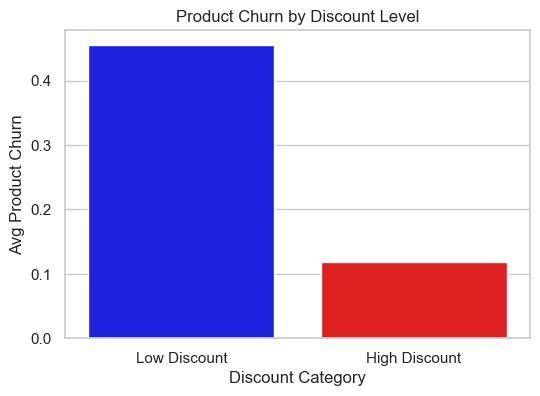

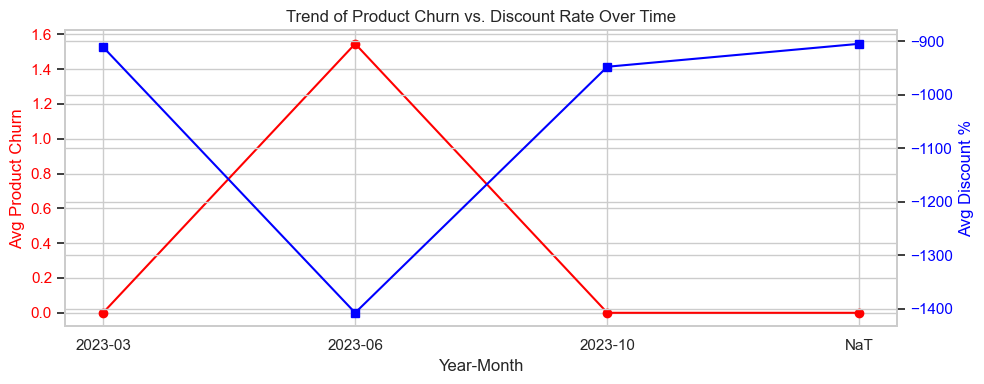

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
product_df = pd.read_csv("product.csv", parse_dates=["score_date"])

# Convert score_date to 'YYYY-MM' for monthly grouping
# product_df["year_month"] = product_df["score_date"].dt.to_period("M").astype(str)
product_df["score_date"] = pd.to_datetime(product_df["score_date"], errors="coerce")
product_df["year_month"] = product_df["score_date"].dt.to_period("M").astype(str)

# Calculate total subscriptions per customer per month
product_df["total_products"] = product_df["team_plus"] + product_df["pro_plus"] + product_df["ent_plus"]

# Group by customer and month, summing up total subscriptions
grouped_df = product_df.groupby(["id", "year_month"])["total_products"].sum().reset_index()

# Shift to get previous month's product count for each customer
grouped_df["prev_total_products"] = grouped_df.groupby("id")["total_products"].shift(1)

# Compute product churn (products lost compared to the previous month)
grouped_df["product_churn"] = np.maximum(grouped_df["prev_total_products"] - grouped_df["total_products"], 0)

# Fill NaN values in the first month with 0 (no churn initially)
grouped_df["product_churn"].fillna(0, inplace=True)

# Merge with discount data
merged_df = grouped_df.merge(product_df[["id", "year_month", "discount_arr_usd_percentage"]], 
                             on=["id", "year_month"], how="left")

# Define High vs. Low Discount Threshold (Median Split)
discount_threshold = merged_df["discount_arr_usd_percentage"].median()
merged_df["high_discount"] = (merged_df["discount_arr_usd_percentage"] >= discount_threshold).astype(int)

# Compute average churn for high vs. low discount groups
churn_analysis = merged_df.groupby("high_discount")["product_churn"].mean()

# Visualization: Bar Plot - Churn by Discount Category
plt.figure(figsize=(6, 4))
sns.barplot(x=churn_analysis.index, y=churn_analysis.values, palette=["blue", "red"])
plt.xticks([0, 1], ["Low Discount", "High Discount"])
plt.xlabel("Discount Category")
plt.ylabel("Avg Product Churn")
plt.title("Product Churn by Discount Level")
plt.show()

# Visualization: Line Plot - Churn vs. Discount Over Time
churn_trend = merged_df.groupby("year_month")["product_churn"].mean().reset_index()
discount_trend = merged_df.groupby("year_month")["discount_arr_usd_percentage"].mean().reset_index()

fig, ax1 = plt.subplots(figsize=(10, 4))

# Churn trend (Red Line)
ax1.set_xlabel("Year-Month")
ax1.set_ylabel("Avg Product Churn", color="red")
ax1.plot(churn_trend["year_month"], churn_trend["product_churn"], color="red", marker="o", label="Product Churn")
ax1.tick_params(axis="y", labelcolor="red")

# Discount trend (Blue Line, Secondary Axis)
ax2 = ax1.twinx()
ax2.set_ylabel("Avg Discount %", color="blue")
ax2.plot(discount_trend["year_month"], discount_trend["discount_arr_usd_percentage"], color="blue", marker="s", label="Discount Rate")
ax2.tick_params(axis="y", labelcolor="blue")

plt.title("Trend of Product Churn vs. Discount Rate Over Time")
fig.tight_layout()
plt.show()


C:\Users\BHARGAV\AppData\Local\Temp\ipykernel_12820\1971772304.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_rates.index, y=churn_rates.values, palette=["blue", "red"])


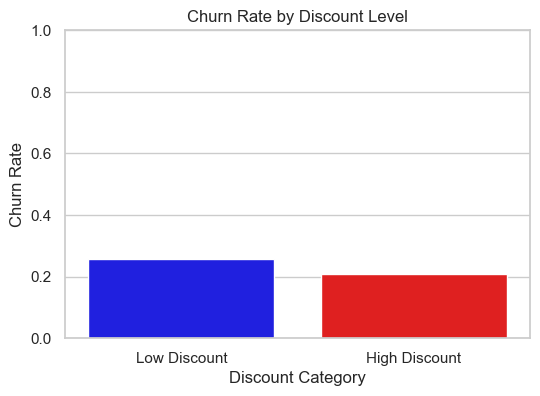

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
product_df = pd.read_csv("product.csv", parse_dates=["score_date"])

# Convert 'score_date' to 'YYYY-MM' format for monthly grouping
product_df["year_month"] = pd.to_datetime(product_df["score_date"], errors='coerce').dt.to_period("M").astype(str)

# Calculate total subscriptions per customer per month
product_df["total_products"] = product_df["team_plus"] + product_df["pro_plus"] + product_df["ent_plus"]

# Group by customer ID and month, summing total subscriptions
grouped_df = product_df.groupby(["id", "year_month"]).agg({"total_products": "sum", "discount_arr_usd_percentage": "mean"}).reset_index()

# Calculate previous month's total products
grouped_df["prev_total_products"] = grouped_df.groupby("id")["total_products"].shift(1)

# Calculate churn flag (1 if total_products decreased from previous month, else 0)
grouped_df["churn_flag"] = (grouped_df["total_products"] < grouped_df["prev_total_products"]).astype(int)

# Define High vs. Low Discount Threshold (median split)
discount_threshold = grouped_df["discount_arr_usd_percentage"].median()
grouped_df["high_discount"] = (grouped_df["discount_arr_usd_percentage"] >= discount_threshold).astype(int)

# Calculate churn rate by discount category
churn_rates = grouped_df.groupby("high_discount")["churn_flag"].mean()

# Plot the bar chart
plt.figure(figsize=(6, 4))
sns.barplot(x=churn_rates.index, y=churn_rates.values, palette=["blue", "red"])
plt.xticks(ticks=[0, 1], labels=["Low Discount", "High Discount"])
plt.ylabel("Churn Rate")
plt.xlabel("Discount Category")
plt.title("Churn Rate by Discount Level")
plt.ylim(0, 1)  # Churn rate is a proportion (0 to 1)
plt.show()
